WARNING:

"fitting_parameters.h5" need to be in the directory you are working on
or there will be an error for importing mr_forecast in the next cell.

If you don't want the file in this directory,
change the mr_forecast.py line 16

hyper_file = 'fitting_parameters.h5' 

->

hyper_file = [directory of fitting parameter file]+'fitting_parameters.h5'

In [1]:
%matplotlib inline
from __future__ import (print_function, absolute_import,
                        division, unicode_literals)
import numpy as np
import mr_forecast as mr
import matplotlib.pyplot as plt

================================

predict the mean and std of radius given those of the mass

In [2]:
Rmedian, Rplus, Rminus = mr.Mstat2R(mean=1.0, std=0.1, unit='Earth', sample_size=100, classify='Yes')

Terran 97.0 %, Neptunian 3.0 %, Jovian 0.0 %, Star 0.0 %


In [3]:
print('R = %.2f (+ %.2f - %.2f) REarth' % (Rmedian, Rplus, Rminus))

R = 1.01 (+ 0.15 - 0.09) REarth


================================

predict a vector of radius given a vector of mass

In [4]:
M1 = np.loadtxt('demo_mass.dat')
R1 = mr.Mpost2R(M1, unit='Earth', classify='Yes')

Terran 100.0 %, Neptunian 0.0 %, Jovian 0.0 %, Star 0.0 %


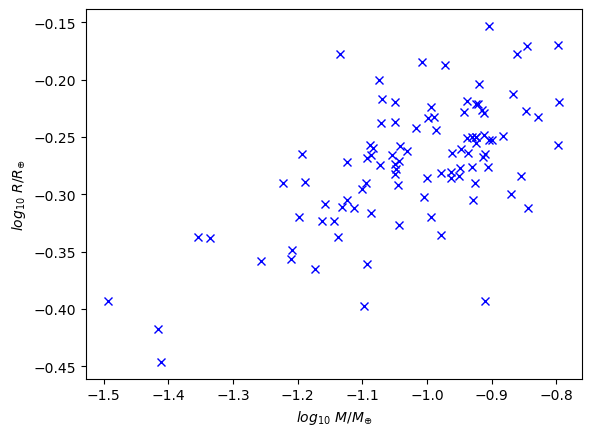

In [5]:
plt.plot(np.log10(M1), np.log10(R1), 'bx')
plt.xlabel(r'$log_{10}\ M/M_{\oplus}$')
plt.ylabel(r'$log_{10}\ R/R_{\oplus}$')
plt.show()

================================

predict the mean and std of mass given those of the radius

In [6]:
Mmedian, Mplus, Mminus = mr.Rstat2M(mean=0.1, std=0.01, unit='Jupiter', sample_size=100, grid_size=1e3, classify='Yes')

Terran 75.0 %, Neptunian 25.0 %, Jovian 0.0 %, Star 0.0 %


In [7]:
print('M = %.3f (+ %.3f - %.3f) MEarth' % (Mmedian, Mplus, Mminus))

M = 0.005 (+ 0.004 - 0.002) MEarth


================================

predict a vector of mass given a vector of radius

In [24]:
mr.Rpost2M(np.ones(100), "Earth", 1e5, classify="Yes")

Terran 84.0 %, Neptunian 16.0 %, Jovian 0.0 %, Star 0.0 %


array([1.16202976, 0.55009804, 0.90865298, 0.93928329, 1.34035853,
       0.82689848, 0.5495284 , 0.63715287, 1.18488553, 0.98309298,
       0.94729714, 1.04030842, 0.47258155, 1.38697771, 0.81128423,
       0.94788619, 0.64352171, 0.68465295, 1.01119138, 0.9910698 ,
       1.06275015, 0.56138293, 2.49933009, 1.25332566, 0.36113417,
       1.13396154, 0.76476081, 1.17145847, 1.20219733, 0.87920369,
       0.83863228, 1.32544427, 0.85088514, 1.21320826, 0.81380976,
       0.75625127, 2.77331404, 1.3281936 , 1.4325443 , 2.24402841,
       3.03616293, 1.03622075, 1.26795378, 1.65753098, 1.11485676,
       1.31832264, 2.45416873, 1.06959876, 0.76428556, 2.08186059,
       1.09675542, 1.73556001, 0.98513218, 2.65522275, 1.13961487,
       1.23195455, 0.89131025, 1.33647583, 1.26821654, 1.07894799,
       0.85459579, 1.10978608, 1.10222326, 1.07827749, 0.73630422,
       1.38353322, 0.64860883, 1.41689786, 1.17803082, 2.02989117,
       0.47700876, 1.43017155, 0.52362727, 0.67703477, 4.09177

In [8]:
R2 = np.loadtxt('demo_radius.dat')
M2 = mr.Rpost2M(R2, unit='Earth', grid_size=1e3, classify='Yes')

Terran 71.0 %, Neptunian 29.0 %, Jovian 0.0 %, Star 0.0 %


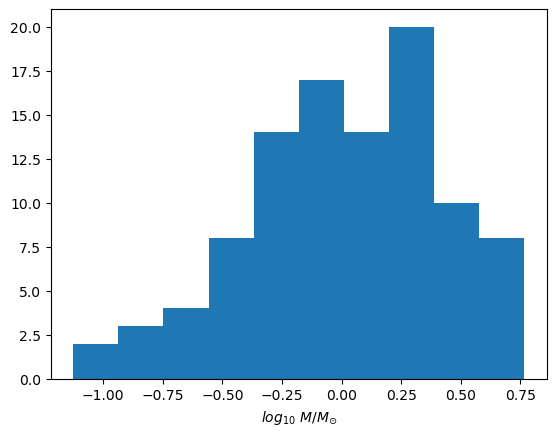

In [9]:
plt.hist(np.log10(M2))
plt.xlabel(r'$log_{10}\ M/M_{\odot}$')
plt.show()